In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy import stats

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("output_data.xlsx")
df.head()

,Tanggal,RR
0,2021-01-01,0.8
1,2021-01-02,2.0
2,2021-01-03,3.2
3,2021-01-04,2.4
4,2021-01-05,49.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  1339 non-null   datetime64[ns]
 1   RR       1339 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.1 KB


In [4]:
df.describe()

,Tanggal,RR
count,1339,1339.000000
mean,2022-11-01 00:00:00,10.131591
min,2021-01-01 00:00:00,0.000000
25%,2021-12-01 12:00:00,0.100000
50%,2022-11-01 00:00:00,3.100000
75%,2023-10-01 12:00:00,14.266667
max,2024-08-31 00:00:00,249.000000
std,NaN,17.354787


In [5]:
df['RR'].isnull().sum()

0

<Axes: >

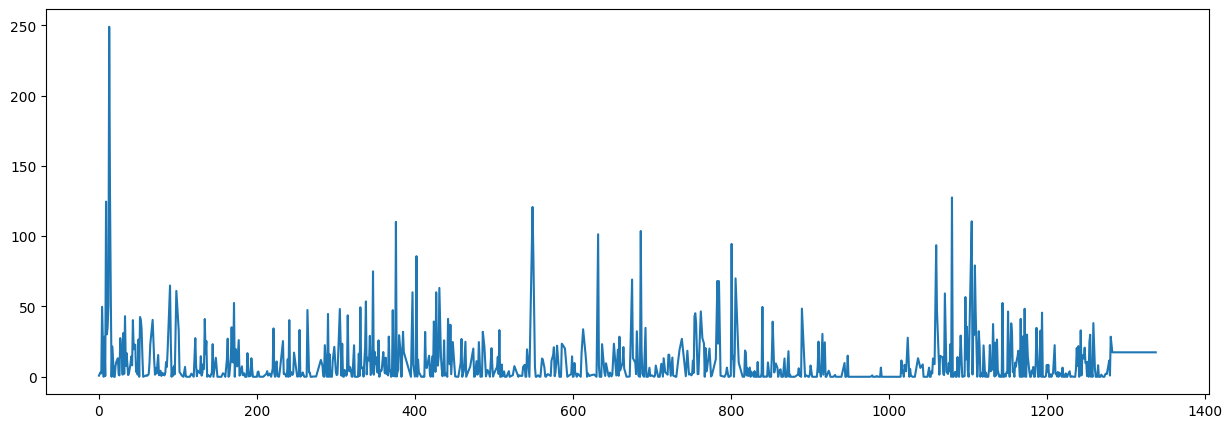

In [6]:
df['RR'].plot(figsize=(15,5))

In [7]:
new_df = pd.DataFrame()
new_df['date'] = df['Tanggal']
new_df['RR'] = df['RR']
new_df.head()

,date,RR
0,2021-01-01,0.8
1,2021-01-02,2.0
2,2021-01-03,3.2
3,2021-01-04,2.4
4,2021-01-05,49.8


In [8]:
print(new_df.duplicated().sum())
new_df.drop_duplicates(subset='date', inplace=True)
new_df.reset_index(drop=True, inplace=True)
new_df.sort_values(by='date')

0


,date,RR
0,2021-01-01,0.8
1,2021-01-02,2.0
2,2021-01-03,3.2
3,2021-01-04,2.4
4,2021-01-05,49.8
...,...,...
1334,2024-08-27,17.4
1335,2024-08-28,17.4
1336,2024-08-29,17.4
1337,2024-08-30,17.4


In [9]:
new_df["zscore_val"] = stats.zscore(new_df['RR'])

threshold = 3
outliers = new_df[(new_df['zscore_val'] > threshold) | (new_df['zscore_val'] < -threshold)]
new_df.loc[outliers.index, 'RR'] = new_df['RR'].median()

new_df.drop(columns=['zscore_val'], inplace=True)

In [10]:
new_df['date'] = pd.to_datetime(new_df['date'])
new_df.set_index('date', inplace=True)

In [11]:
new_df.sort_index(inplace=True)

<Axes: xlabel='date'>

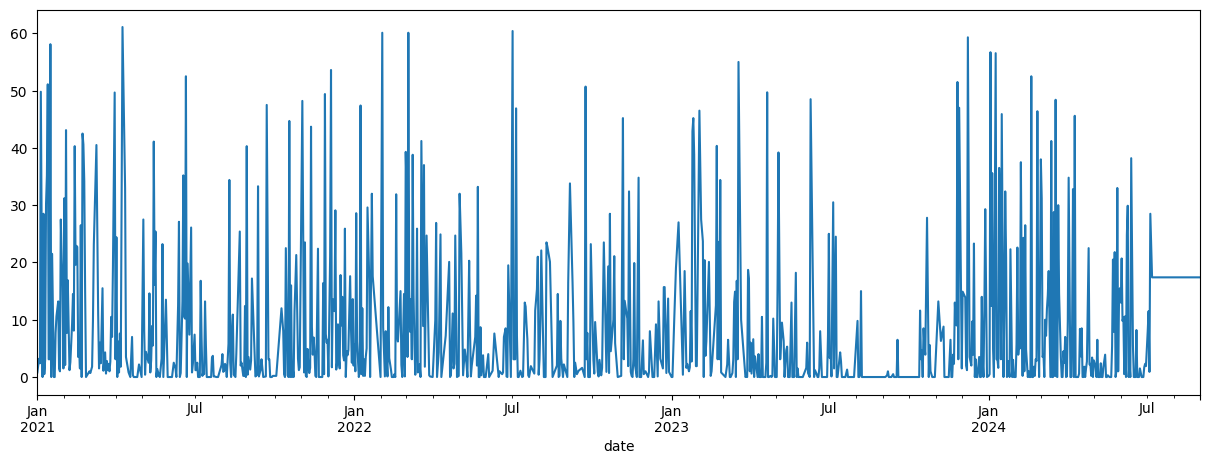

In [12]:
new_df['RR'].plot(figsize=(15,5))

In [13]:
new_df.describe()

,RR
count,1339.000000
mean,8.488598
std,11.802741
min,0.000000
25%,0.100000
50%,3.100000
75%,13.200000
max,61.100000


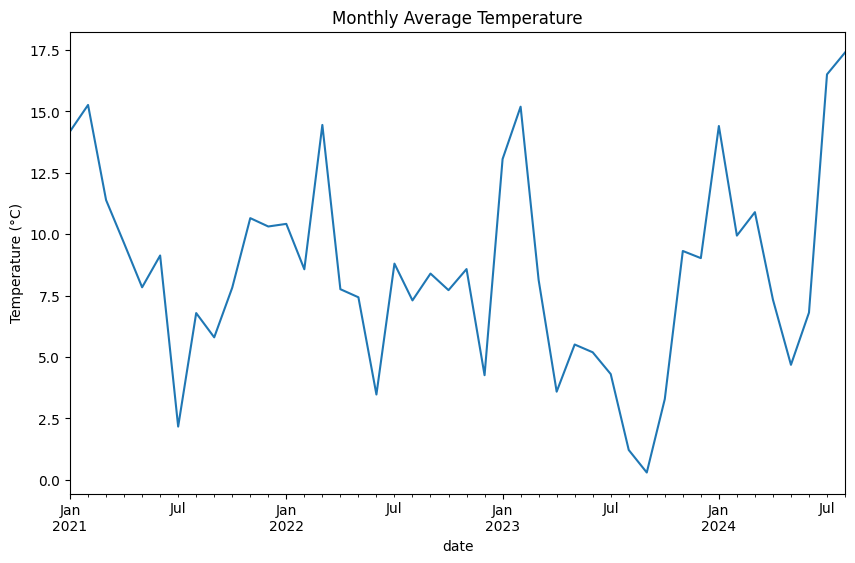

,RR
date,
2021-01,14.187097
2021-02,15.264286
2021-03,11.390323
2021-04,9.628333
2021-05,7.835484


In [14]:
# Menghitung rata-rata suhu bulanan
monthly_avg = new_df['RR'].resample('M').mean()

monthly_df = pd.DataFrame(monthly_avg)
monthly_df.index = monthly_df.index.strftime('%Y-%m')

# Visualisasi rata-rata bulanan
monthly_avg.plot(figsize=(10, 6), title='Monthly Average Temperature')
plt.ylabel('Temperature (°C)')
plt.show()

monthly_df.head()

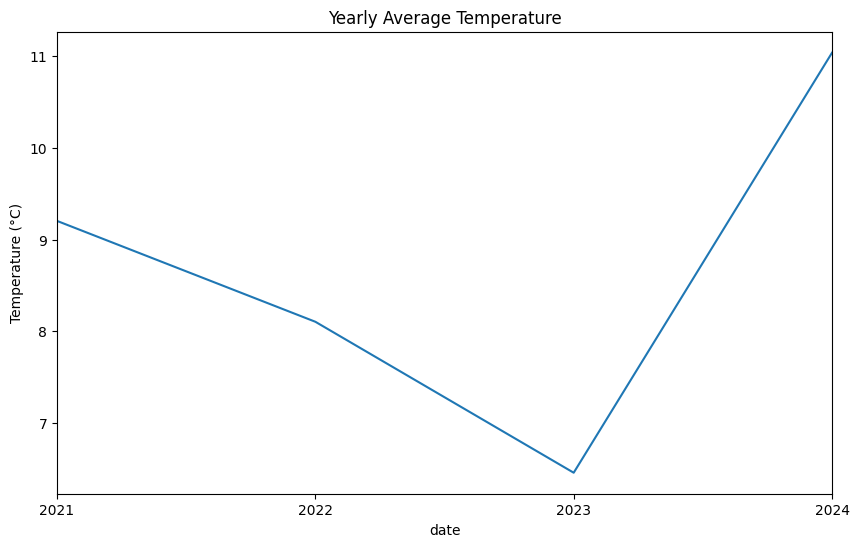

In [15]:
# Menghitung rata-rata suhu tahunan
yearly_avg = new_df['RR'].resample('Y').mean()

# Visualisasi rata-rata tahunan
yearly_avg.plot(figsize=(10, 6), title='Yearly Average Temperature')
plt.ylabel('Temperature (°C)')
plt.show()

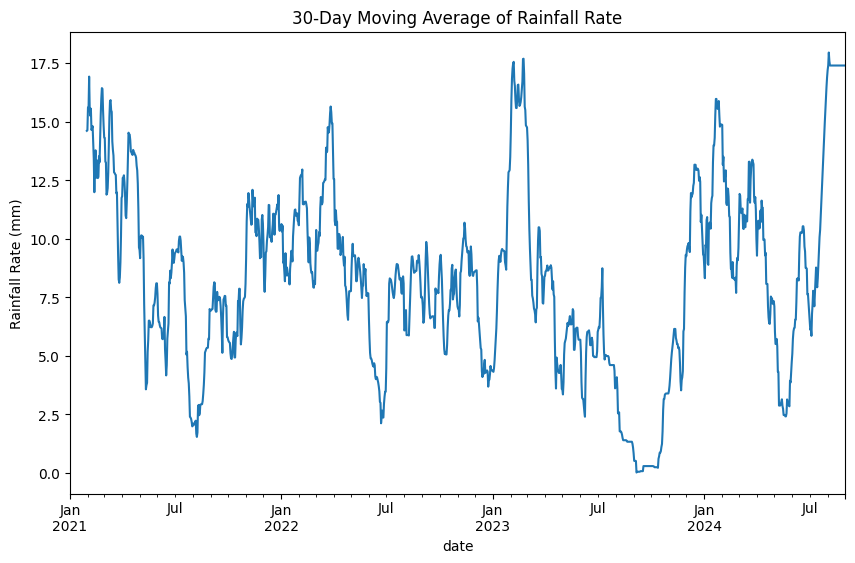

In [16]:
# Moving average dengan window 30 hari
new_df['RR'].rolling(window=30).mean().plot(figsize=(10, 6), title='30-Day Moving Average of Rainfall Rate')
plt.ylabel('Rainfall Rate (mm)')
plt.show()

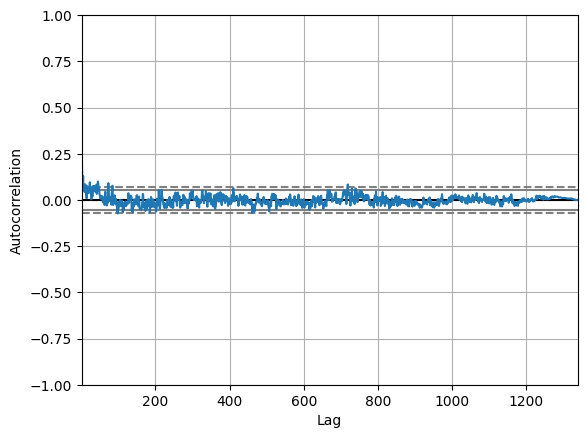

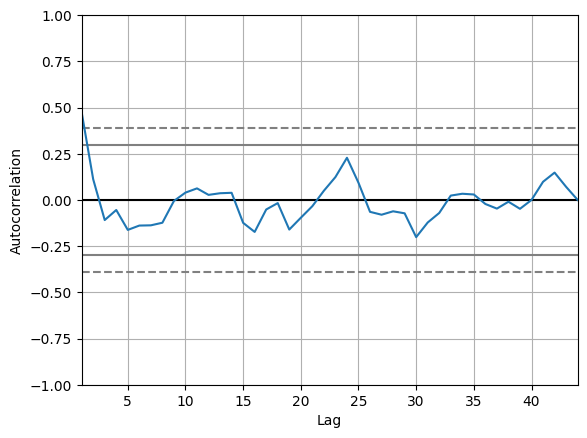

In [17]:
from pandas.plotting import autocorrelation_plot

# Plot autokorelasi
autocorrelation_plot(new_df['RR'])
plt.show()

autocorrelation_plot(monthly_df['RR'])
plt.show()

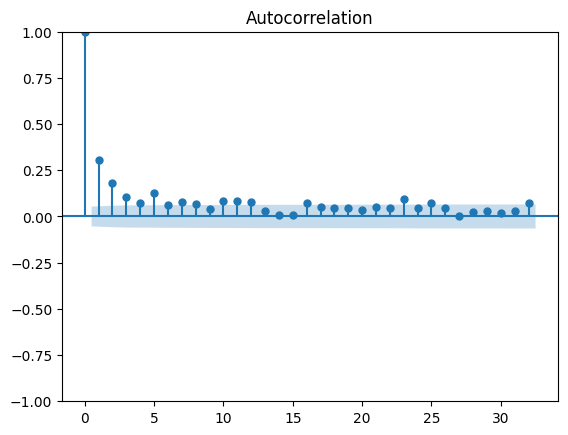

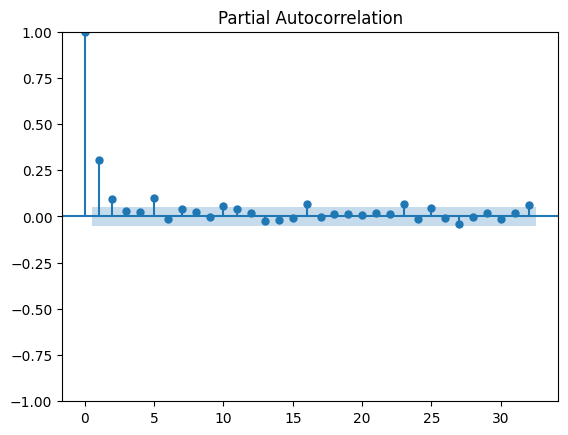

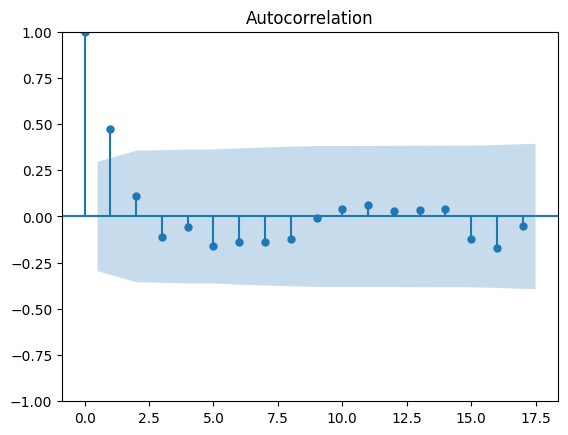

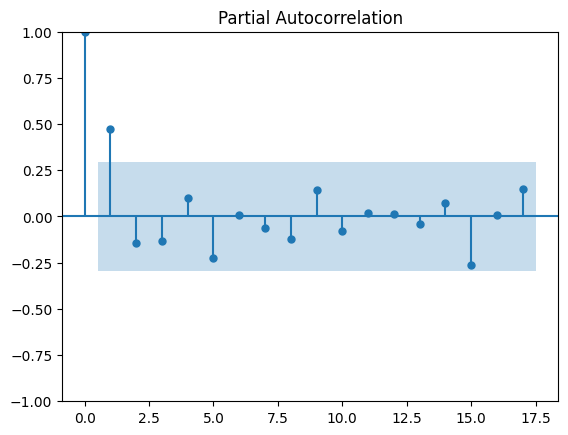

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF dan PACF
plot_acf(new_df['RR'])
plot_pacf(new_df['RR'])
plt.show()

# Plot ACF dan PACF
plot_acf(monthly_df['RR'])
plot_pacf(monthly_df['RR'])
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(df):
    result = adfuller(df, autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used', 'Critical Values']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))

In [20]:
adfuller_test(new_df['RR'])

ADF Test Statistic : -12.433575216829087
p-value : 3.8916366134432507e-23
#Lags Used : 4
Number of Observations Used : 1334
Critical Values : {'1%': -3.4352614901385388, '5%': -2.863709037790883, '10%': -2.5679248018719276}


In [21]:
adfuller_test(monthly_df['RR'])

ADF Test Statistic : -3.3596572734862087
p-value : 0.012413482723664786
#Lags Used : 0
Number of Observations Used : 43
Critical Values : {'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}


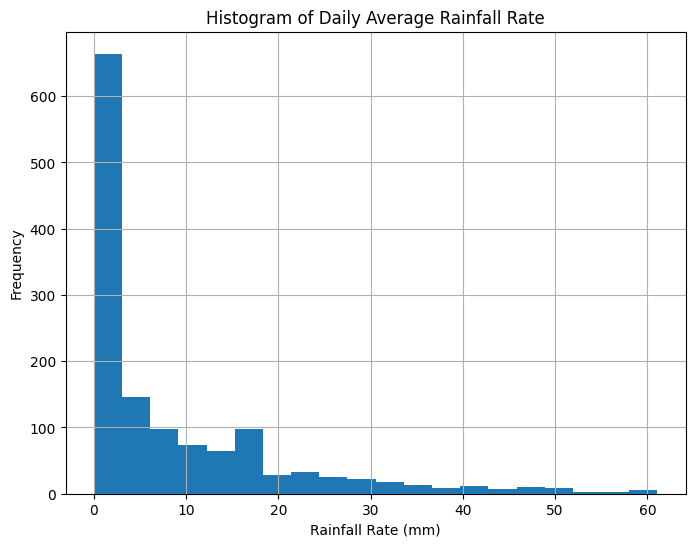

In [22]:
# Histogram dari data RR Daily
new_df['RR'].hist(bins=20, figsize=(8, 6))
plt.title('Histogram of Daily Average Rainfall Rate')
plt.xlabel('Rainfall Rate (mm)')
plt.ylabel('Frequency')
plt.show()

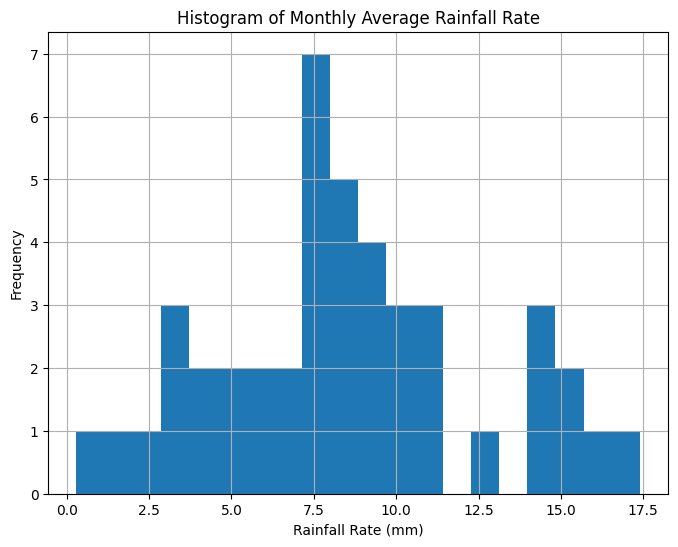

In [23]:
# Histogram dari data RR Monthly
monthly_df['RR'].hist(bins=20, figsize=(8, 6))
plt.title('Histogram of Monthly Average Rainfall Rate')
plt.xlabel('Rainfall Rate (mm)')
plt.ylabel('Frequency')
plt.show()

In [24]:
df_arima = new_df.copy()
df_arima.head()

,RR
date,
2021-01-01,0.8
2021-01-02,2.0
2021-01-03,3.2
2021-01-04,2.4
2021-01-05,49.8


In [25]:
df_arima_monthly = monthly_df.copy()
df_arima_monthly.head()

,RR
date,
2021-01,14.187097
2021-02,15.264286
2021-03,11.390323
2021-04,9.628333
2021-05,7.835484


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'new_df' is your DataFrame with 'Tanggal' as the index and 'RR' as the target
X = new_df.index  # Feature (date)
y = new_df['RR']  # Target (rainfall rate)

# Skenario 1: 80% Train - 20% Test
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.20, shuffle=False)
train_80_df = pd.DataFrame({'date': X_train_80, 'RR': y_train_80}).reset_index(drop=True)  # Resetting index
test_80_df = pd.DataFrame({'date': X_test_80, 'RR': y_test_80}).reset_index(drop=True)    # Resetting index

# Skenario 2: 70% Train - 30% Test
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.30, shuffle=False)
train_70_df = pd.DataFrame({'date': X_train_70, 'RR': y_train_70}).reset_index(drop=True)  # Resetting index
test_70_df = pd.DataFrame({'date': X_test_70, 'RR': y_test_70}).reset_index(drop=True)    # Resetting index

# Skenario 3: 60% Train - 40% Test
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X, y, test_size=0.40, shuffle=False)
train_60_df = pd.DataFrame({'date': X_train_60, 'RR': y_train_60}).reset_index(drop=True)  # Resetting index
test_60_df = pd.DataFrame({'date': X_test_60, 'RR': y_test_60}).reset_index(drop=True)    # Resetting index

# Displaying the DataFrames
print("Train Data (80-20 Split):")
print(train_80_df.head())

print("\nTest Data (80-20 Split):")
print(test_80_df.head())

print("\nTrain Data (70-30 Split):")
print(train_70_df.head())

print("\nTest Data (70-30 Split):")
print(test_70_df.head())

print("\nTrain Data (60-40 Split):")
print(train_60_df.head())

print("\nTest Data (60-40 Split):")
print(test_60_df.head())


Train Data (80-20 Split):
        date    RR
0 2021-01-01   0.8
1 2021-01-02   2.0
2 2021-01-03   3.2
3 2021-01-04   2.4
4 2021-01-05  49.8

Test Data (80-20 Split):
        date     RR
0 2023-12-08  59.30
1 2023-12-09  31.40
2 2023-12-10   3.50
3 2023-12-11   2.75
4 2023-12-12   2.00

Train Data (70-30 Split):
        date    RR
0 2021-01-01   0.8
1 2021-01-02   2.0
2 2021-01-03   3.2
3 2021-01-04   2.4
4 2021-01-05  49.8

Test Data (70-30 Split):
        date    RR
0 2023-07-27  0.00
1 2023-07-28  0.00
2 2023-07-29  0.00
3 2023-07-30  0.00
4 2023-07-31  2.45

Train Data (60-40 Split):
        date    RR
0 2021-01-01   0.8
1 2021-01-02   2.0
2 2021-01-03   3.2
3 2021-01-04   2.4
4 2021-01-05  49.8

Test Data (60-40 Split):
        date    RR
0 2023-03-15  14.9
1 2023-03-16   0.0
2 2023-03-17  16.8
3 2023-03-18   3.1
4 2023-03-19  55.0


In [27]:
df_train_arima = train_70_df
df_test_arima = test_70_df

df_train_list = [train_80_df, train_70_df, train_60_df]
df_test_list = [test_80_df, test_70_df, test_60_df]

for i in range(0,3):
    print(df_train_list[i].head())
    print(df_test_list[i].head())

        date    RR
0 2021-01-01   0.8
1 2021-01-02   2.0
2 2021-01-03   3.2
3 2021-01-04   2.4
4 2021-01-05  49.8
        date     RR
0 2023-12-08  59.30
1 2023-12-09  31.40
2 2023-12-10   3.50
3 2023-12-11   2.75
4 2023-12-12   2.00
        date    RR
0 2021-01-01   0.8
1 2021-01-02   2.0
2 2021-01-03   3.2
3 2021-01-04   2.4
4 2021-01-05  49.8
        date    RR
0 2023-07-27  0.00
1 2023-07-28  0.00
2 2023-07-29  0.00
3 2023-07-30  0.00
4 2023-07-31  2.45
        date    RR
0 2021-01-01   0.8
1 2021-01-02   2.0
2 2021-01-03   3.2
3 2021-01-04   2.4
4 2021-01-05  49.8
        date    RR
0 2023-03-15  14.9
1 2023-03-16   0.0
2 2023-03-17  16.8
3 2023-03-18   3.1
4 2023-03-19  55.0


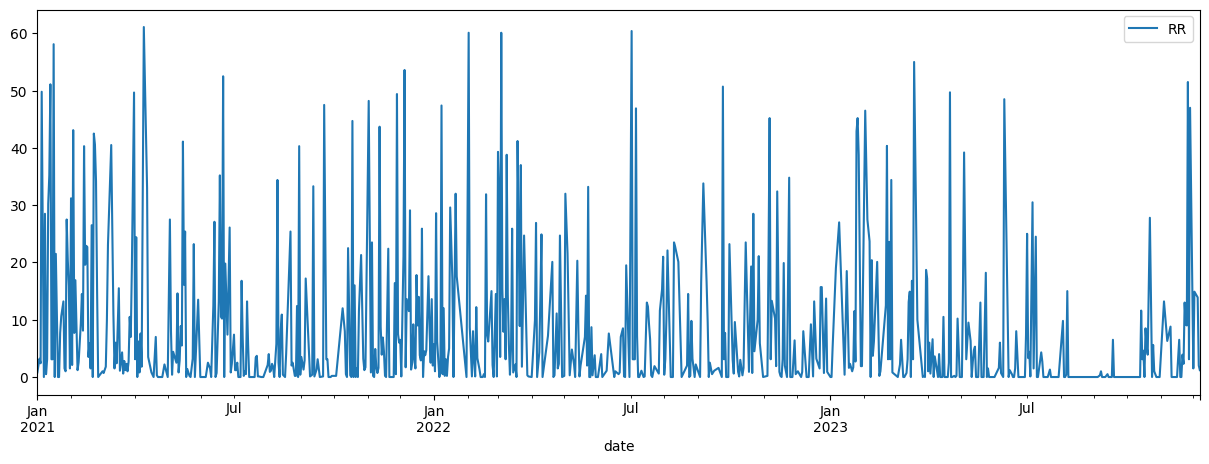

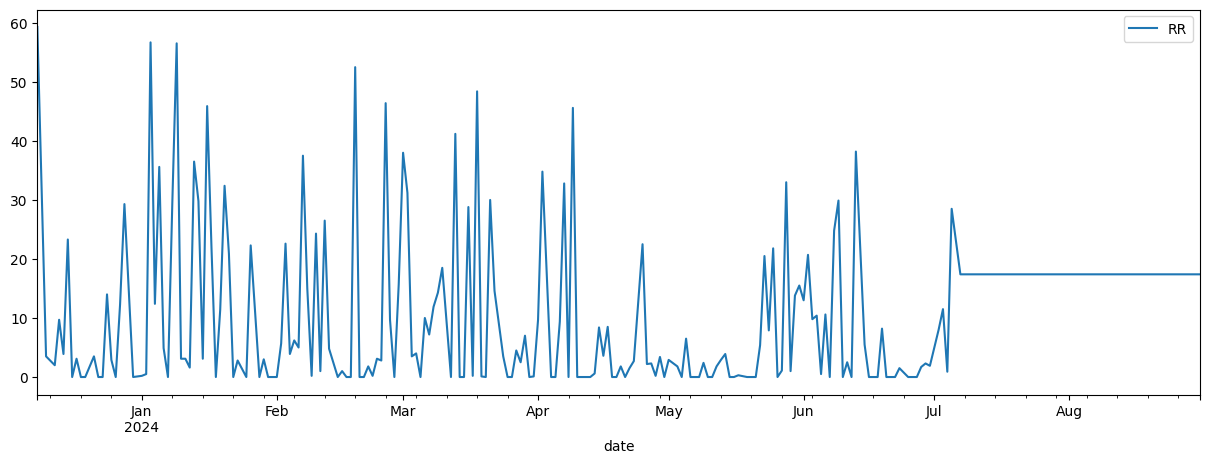

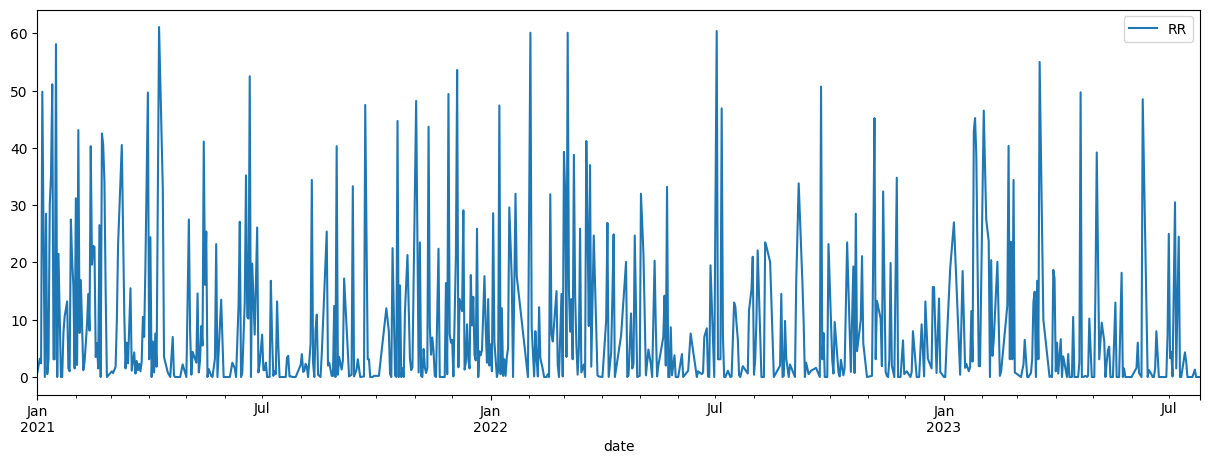

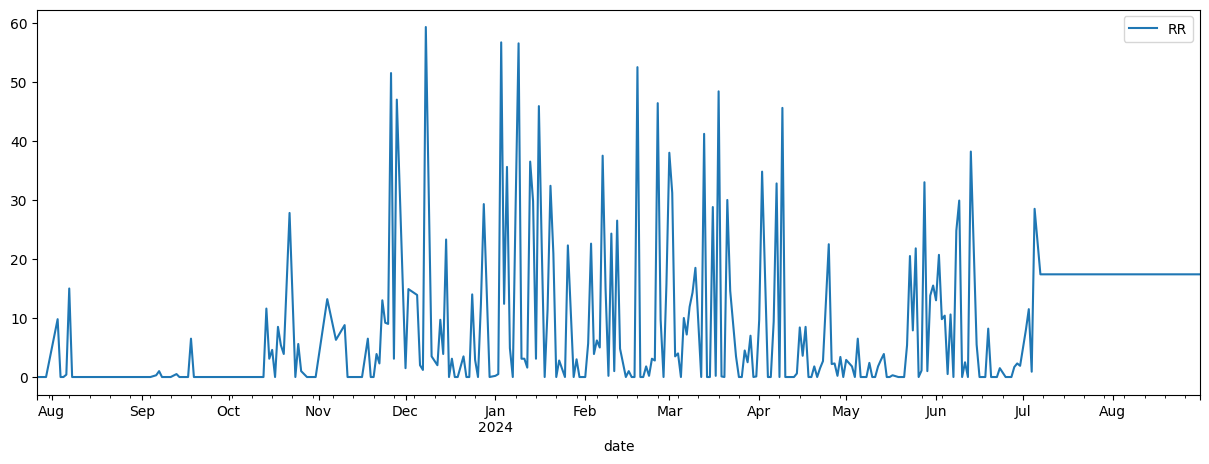

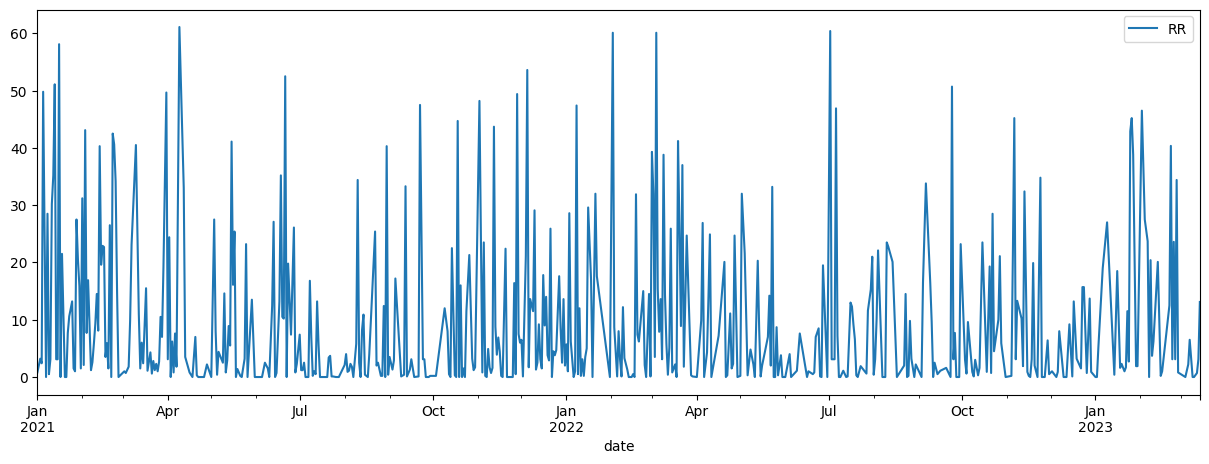

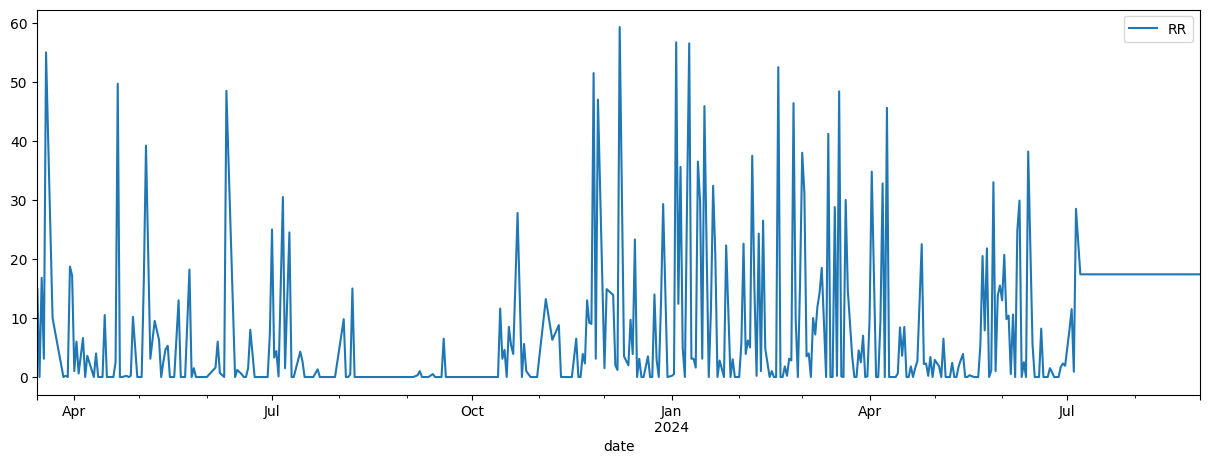

In [28]:
for i in range(0,3):
    # Set index for every dataset
    df_train_list[i].set_index('date', inplace=True)
    df_test_list[i].set_index('date', inplace=True)

    # Plot every dataset
    df_train_list[i].plot(figsize=(15,5))
    df_test_list[i].plot(figsize=(15,5))

In [29]:
for df in df_train_list:
    adfuller_test(df['RR'])
    print()

ADF Test Statistic : -16.914778809085828
p-value : 1.0043564403607983e-29
#Lags Used : 1
Number of Observations Used : 1069
Critical Values : {'1%': -3.4364819663568262, '5%': -2.864247479652846, '10%': -2.568211560046239}

ADF Test Statistic : -16.481438602959017
p-value : 2.2352526168674207e-29
#Lags Used : 1
Number of Observations Used : 935
Critical Values : {'1%': -3.437363201927513, '5%': -2.864636122077874, '10%': -2.5684185607252137}

ADF Test Statistic : -15.335294974469678
p-value : 3.896267495194438e-28
#Lags Used : 1
Number of Observations Used : 801
Critical Values : {'1%': -3.4385402373395473, '5%': -2.8651550415718114, '10%': -2.5686949773613197}



In [30]:
import itertools
from statsmodels.tsa.arima.model import ARIMA

# Tentukan range untuk p, d, q
p = range(0, 5)
d = range(0, 1)
q = range(0, 16)

# Kombinasi p, d, q
pdq = list(itertools.product(p, d, q))

# Iterasi untuk mencari model terbaik berdasarkan AIC
best_aic = float("inf")
best_pdq = None
output = []
result = []

for i in range(0,3):
    for param in pdq:
        try:
            model = ARIMA(df_train_list[i]['RR'], order=param)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
        except:
            continue
    
    string = f'Best ARIMA model for dataframe {i}: ARIMA{best_pdq} with AIC: {best_aic}'
    result.append({
        'i': i,
        'best_pdq': best_pdq,
        'best_aic': best_aic
    })
    output.append(string)

for o in output:
    print(o)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\

Best ARIMA model for dataframe 0: ARIMA(4, 0, 3) with AIC: 8147.332519654835
Best ARIMA model for dataframe 1: ARIMA(4, 0, 2) with AIC: 7203.911865956723
Best ARIMA model for dataframe 2: ARIMA(3, 0, 2) with AIC: 6200.482303163484


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [31]:
from statsmodels.tsa.arima.model import ARIMA

models = []

for res in result:
    df_train: pd.DataFrame = df_train_list[res['i']]

    # Convert best_pdq to a tuple to ensure it's treated as such
    best_pdq: tuple[int, int, int] = (int(res['best_pdq'][0]), int(res['best_pdq'][1]), int(res['best_pdq'][2]))  # Explicitly cast to a tuple
    
    # Create ARIMA model with the tuple (p, d, q) as order
    model = ARIMA(df_train, order=best_pdq)
    model_fit = model.fit()

    # Store the fitted model and print the summary
    models.append(model_fit)
    print(f'Model for dataset {res["i"]}')
    print(model_fit.summary())


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Model for dataset 0
                               SARIMAX Results                                
Dep. Variable:                     RR   No. Observations:                 1071
Model:                 ARIMA(4, 0, 3)   Log Likelihood               -4064.666
Date:                Fri, 25 Oct 2024   AIC                           8147.333
Time:                        05:36:13   BIC                           8192.120
Sample:                    01-01-2021   HQIC                          8164.298
                         - 12-07-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1166      1.920      4.228      0.000       4.354      11.879
ar.L1          0.0303      0.111      0.273      0.785      -0.187       0.248
ar.L2          0.6130      0.108

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Model for dataset 1
                               SARIMAX Results                                
Dep. Variable:                     RR   No. Observations:                  937
Model:                 ARIMA(4, 0, 2)   Log Likelihood               -3593.956
Date:                Fri, 25 Oct 2024   AIC                           7203.912
Time:                        05:36:15   BIC                           7242.653
Sample:                    01-01-2021   HQIC                          7218.683
                         - 07-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4925      0.983      8.637      0.000       6.565      10.420
ar.L1         -1.0306      0.114     -9.057      0.000      -1.254      -0.808
ar.L2         -0.3512      0.094

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Model for dataset 2
                               SARIMAX Results                                
Dep. Variable:                     RR   No. Observations:                  803
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -3093.241
Date:                Fri, 25 Oct 2024   AIC                           6200.482
Time:                        05:36:16   BIC                           6233.301
Sample:                    01-01-2021   HQIC                          6213.087
                         - 03-14-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9367      1.012      8.830      0.000       6.953      10.920
ar.L1         -0.9969      0.104     -9.614      0.000      -1.200      -0.794
ar.L2         -0.3346      0.104

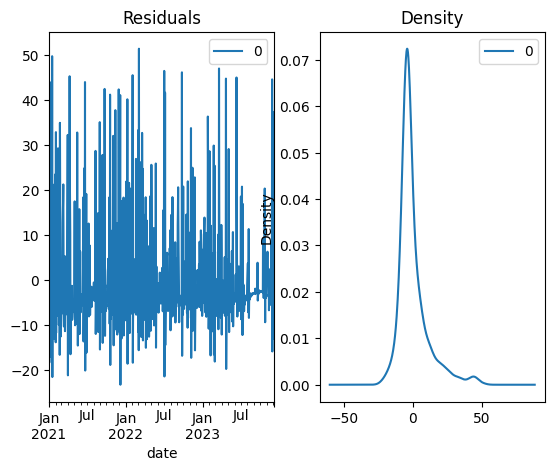

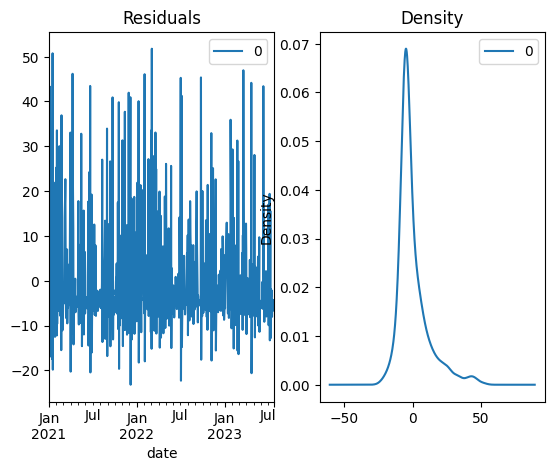

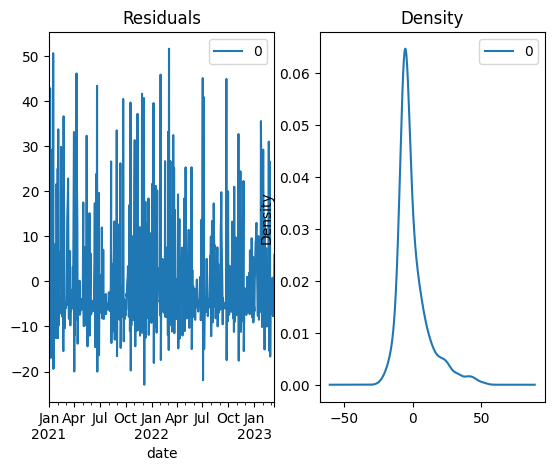

In [32]:
import matplotlib.pyplot as plt

residuals = []

for m in models:
    res = pd.DataFrame(m.resid)
    residuals.append(res)
    fig, ax = plt.subplots(1,2)
    res.plot(title = 'Residuals', ax = ax[0])
    res.plot(kind = 'kde', title = 'Density', ax = ax[1])
    plt.show()

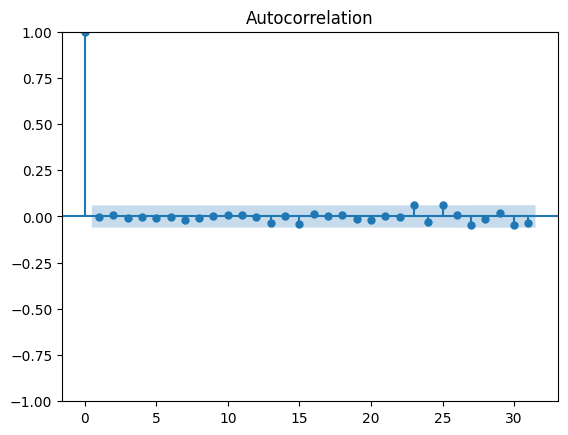

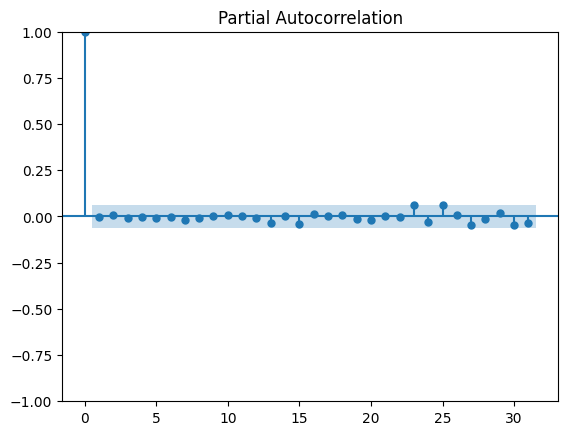

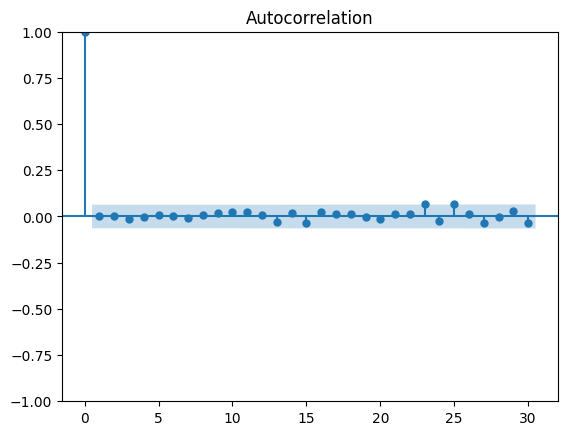

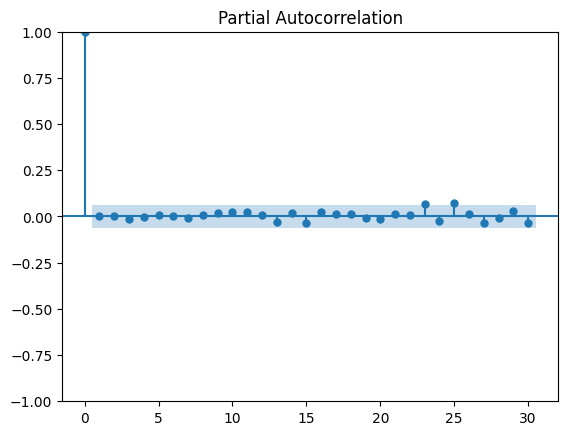

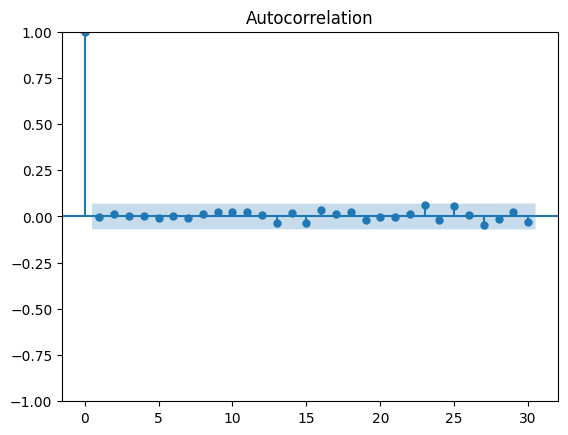

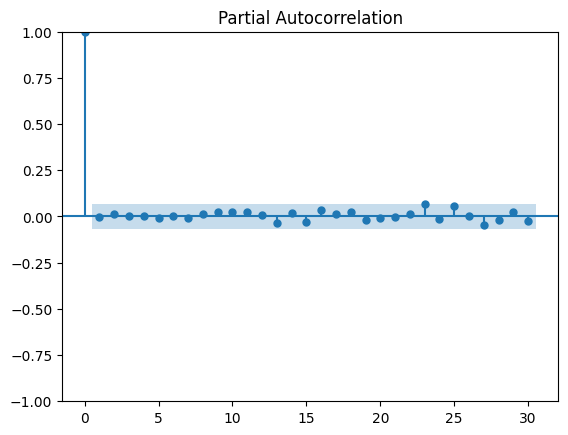

In [33]:
for res in residuals:
    acf_residuals = plot_acf(res)
    pacf_residuals = plot_pacf(res)

In [34]:
forecast_tests = []
for i in range(0,3):
    forecast_tests.append(models[i].forecast(len(df_test_list[i])))

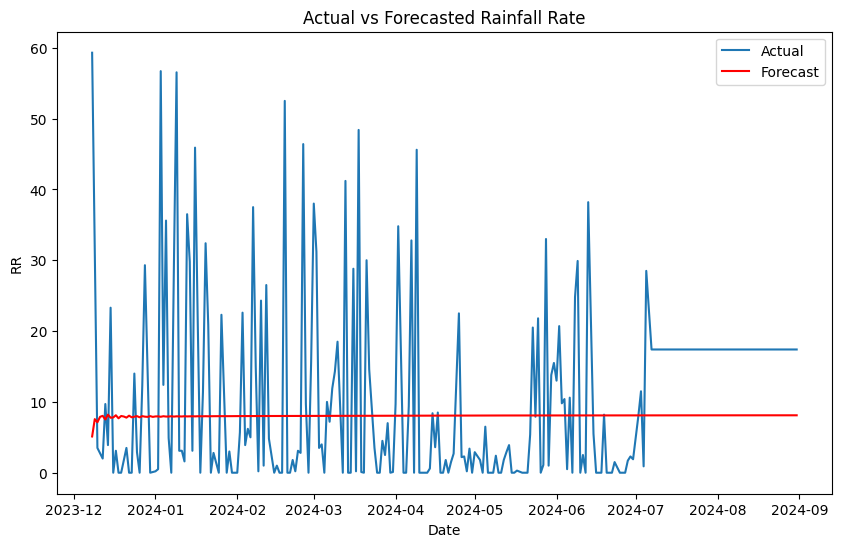

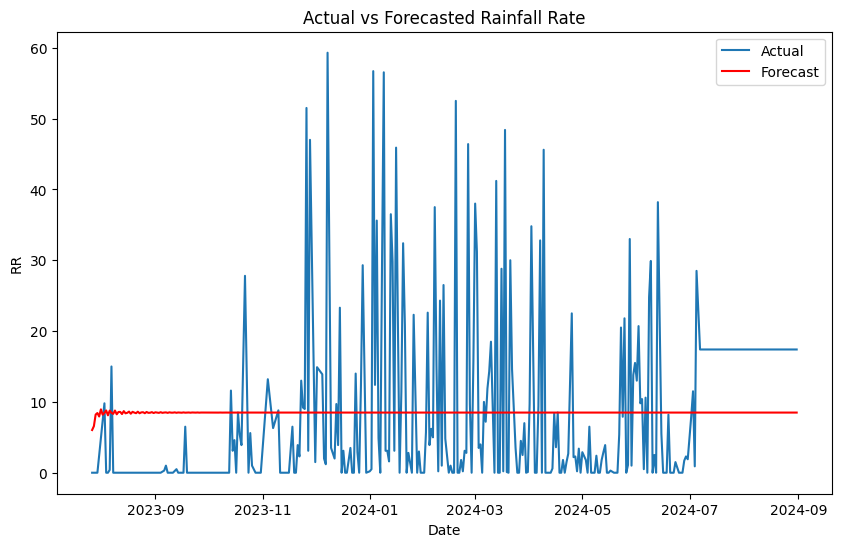

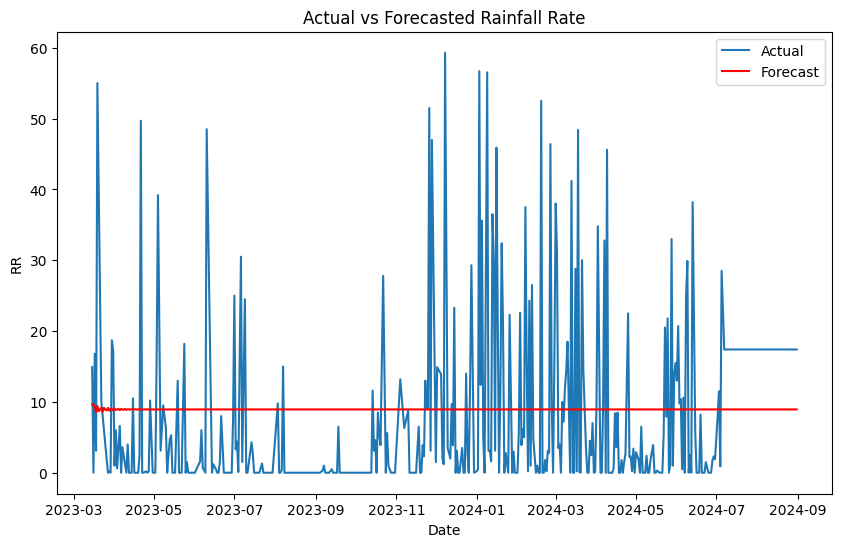

In [35]:
for i in range(0,3):
    plt.figure(figsize=(10, 6))
    plt.plot(df_test_list[i].index, df_test_list[i]['RR'], label='Actual')
    plt.plot(df_test_list[i].index, forecast_tests[i], label='Forecast', color='red')
    plt.title('Actual vs Forecasted Rainfall Rate')
    plt.xlabel('Date')
    plt.ylabel('RR')
    plt.legend()
    plt.show()

# Convolutional Neural Network (CNN)

In [36]:
for df in df_train_list:
    print(df['RR'].isna().sum())  # Forward fill
for df in df_test_list:
    print(df['RR'].isna().sum())

0
0
0
0
0
0


In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df_train_list and df_test_list are lists of DataFrames
scaler = MinMaxScaler()

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

def preprocess_data(df, seq_length=2):
    # Normalize the RR values
    scaled_data = scaler.fit_transform(df[['RR']])
    
    # Create sequences
    sequences = create_sequences(scaled_data, seq_length)
    
    return sequences  # This will return the sequences with shape (samples, seq_length, features)

# Preprocess each training and testing dataset with a sequence length
seq_length = 5  # Set this to a value that makes sense for your data
df_train_processed = [preprocess_data(df, seq_length) for df in df_train_list]
df_test_processed = [preprocess_data(df, seq_length) for df in df_test_list]

# Optional: If you want to extract targets for each sequence:
def get_targets(df, seq_length):
    targets = df['RR'].values[seq_length:]  # Targets are the next value after each sequence
    return targets

# Get targets for training and testing datasets
train_targets = [get_targets(df, seq_length) for df in df_train_list]
test_targets = [get_targets(df, seq_length) for df in df_test_list]

# Now df_train_processed and train_targets can be used for model training
# Similarly, df_test_processed and test_targets can be used for evaluation

In [38]:
# Verify the shapes of processed data
for train_data in df_train_processed:
    print(train_data.shape)  # Should be (samples, seq_length, features)

for test_data in df_test_processed:
    print(test_data.shape)  # Should be (samples, seq_length, features)

(1066, 5, 1)
(932, 5, 1)
(798, 5, 1)
(263, 5, 1)
(397, 5, 1)
(531, 5, 1)


In [39]:
# Print shapes and some sample data from processed training sets
for i, train_data in enumerate(df_train_processed):
    print(f"Train Data {i} Shape: {train_data.shape}")
    print(f"Sample Data from Train Data {i}:\n{train_data[:5]}\n")  # Print first 5 sequences

Train Data 0 Shape: (1066, 5, 1)
Sample Data from Train Data 0:
[[[0.01309329]
  [0.03273322]
  [0.05237316]
  [0.03927987]
  [0.81505728]]

 [[0.03273322]
  [0.05237316]
  [0.03927987]
  [0.81505728]
  [0.40752864]]

 [[0.05237316]
  [0.03927987]
  [0.81505728]
  [0.40752864]
  [0.        ]]

 [[0.03927987]
  [0.81505728]
  [0.40752864]
  [0.        ]
  [0.46644845]]

 [[0.81505728]
  [0.40752864]
  [0.        ]
  [0.46644845]
  [0.00818331]]]

Train Data 1 Shape: (932, 5, 1)
Sample Data from Train Data 1:
[[[0.01309329]
  [0.03273322]
  [0.05237316]
  [0.03927987]
  [0.81505728]]

 [[0.03273322]
  [0.05237316]
  [0.03927987]
  [0.81505728]
  [0.40752864]]

 [[0.05237316]
  [0.03927987]
  [0.81505728]
  [0.40752864]
  [0.        ]]

 [[0.03927987]
  [0.81505728]
  [0.40752864]
  [0.        ]
  [0.46644845]]

 [[0.81505728]
  [0.40752864]
  [0.        ]
  [0.46644845]
  [0.00818331]]]

Train Data 2 Shape: (798, 5, 1)
Sample Data from Train Data 2:
[[[0.01309329]
  [0.03273322]
  [0.052

In [40]:
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense, Dropout

def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Update this part to use the correct input shape
cnn_models = []
for i, train_data in enumerate(df_train_processed):
    # Determine the input shape from the processed train data
    input_shape = (train_data.shape[1], train_data.shape[2])  # (time_steps, features)
    model = create_cnn_model(input_shape)

    # Fit the model using the processed data and corresponding target values
    model.fit(train_data, train_targets[i], epochs=50, batch_size=16)
    
    cnn_models.append(model)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 181.7573
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 150.6999
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 125.8794
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 117.6158
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 129.7833
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 131.8378
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 135.8769
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 130.3642
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 111.7502
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 117.8111
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 137.5696
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 121.6688
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 121.8185
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 144.6949
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

In [41]:
from sklearn.metrics import mean_squared_error

predictions = []

# Evaluate each model on the corresponding test data
for i, model in enumerate(cnn_models):
    test_data = df_test_processed[i]
    test_targets_values = test_targets[i]
    
    predictions.append(model.predict(test_data))
    mse = mean_squared_error(test_targets_values, predictions[i])
    print(f"Model {i + 1} Test MSE: {mse}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Model 1 Test MSE: 143.85257029342384
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model 2 Test MSE: 121.79739361982332
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Model 3 Test MSE: 111.36890335483338


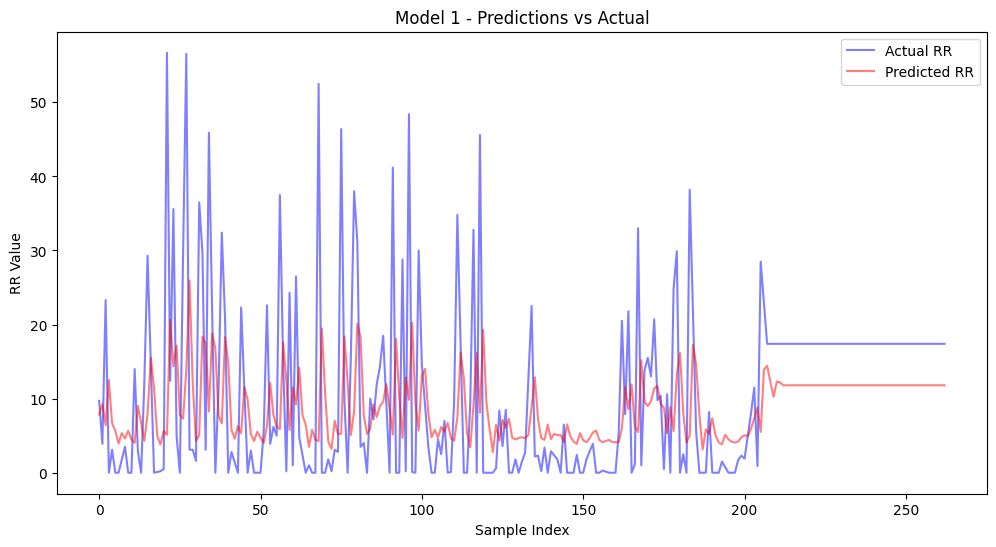

Model 1 - MSE: 143.8526, MAE: 8.4526, R²: -0.0078


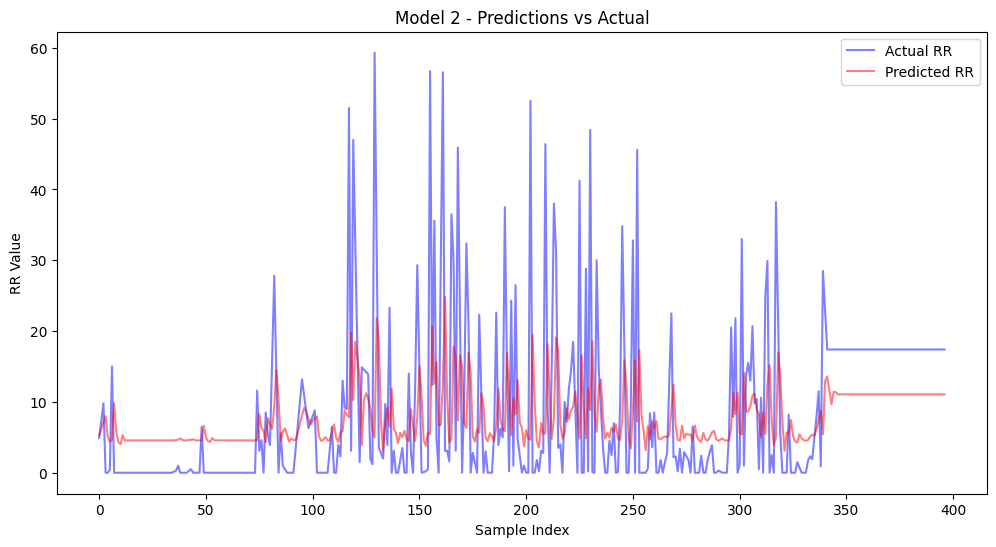

Model 2 - MSE: 121.7974, MAE: 7.5761, R²: 0.0896


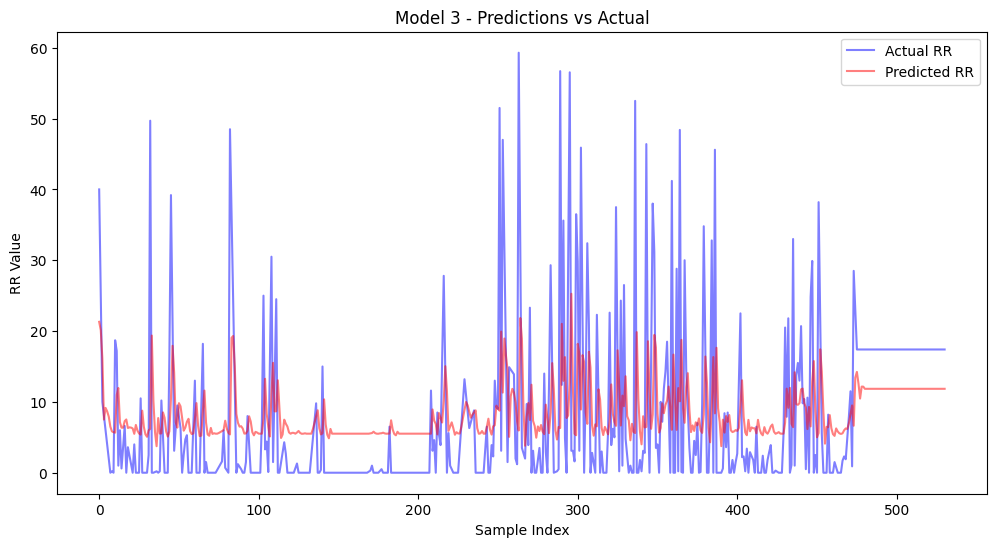

Model 3 - MSE: 111.3689, MAE: 7.5587, R²: 0.1165


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have actual values for comparison
# Prepare a function to visualize predictions vs actual values
def visualize_predictions(actual, predicted, model_index):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, label='Actual RR', color='blue', alpha=0.5)
    plt.plot(predicted, label='Predicted RR', color='red', alpha=0.5)
    plt.title(f'Model {model_index + 1} - Predictions vs Actual')
    plt.xlabel('Sample Index')
    plt.ylabel('RR Value')
    plt.legend()
    plt.show()

# Compare and visualize each model's predictions
for i in range(len(cnn_models)):
    # Get the actual values from the corresponding test dataset
    actual_values = df_test_list[i]['RR'].values[seq_length:]  # Adjust for sequence length
    visualize_predictions(actual_values, predictions[i], i)

    # Calculate metrics
    mse = mean_squared_error(actual_values, predictions[i])
    mae = mean_absolute_error(actual_values, predictions[i])
    r2 = r2_score(actual_values, predictions[i])
    
    # Print the results
    print(f"Model {i + 1} - MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")


# ARIMA + CNN

In [43]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense, Dropout
from sklearn.metrics import mean_squared_error

In [44]:
# 1. Define the function to fit ARIMA and get residuals
def fit_arima(df_train, order):
    model = ARIMA(df_train['RR'], order=order)
    arima_model = model.fit()
    predictions_arima = arima_model.predict(start=0, end=len(df_train) - 1)
    residuals = df_train['RR'] - predictions_arima  # Residuals are the difference between actual and ARIMA prediction
    return predictions_arima, residuals

In [45]:
# 2. Preprocess data for CNN (using residuals from ARIMA)
scaler = MinMaxScaler()

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

def preprocess_data_for_cnn(residuals, seq_length=5):
    scaled_residuals = scaler.fit_transform(residuals.values.reshape(-1, 1))
    sequences = create_sequences(scaled_residuals, seq_length)
    return sequences

In [46]:
# 3. CNN Model definition
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer for regression (predicting residuals)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [47]:
# 4. Hybrid model training and prediction
def hybrid_arima_cnn(df_train, df_test, arima_order, seq_length=5):
    # Step 1: Train ARIMA on train set and get residuals
    arima_train_pred, residuals_train = fit_arima(df_train, arima_order)

    # Step 2: Preprocess residuals and prepare CNN training data
    train_sequences = preprocess_data_for_cnn(residuals_train, seq_length)
    train_targets = residuals_train[seq_length:]  # Residuals shifted for target
    
    # Step 3: Define and train CNN on residuals
    input_shape = (train_sequences.shape[1], train_sequences.shape[2])  # (time_steps, features)
    cnn_model = create_cnn_model(input_shape)
    cnn_model.fit(train_sequences, train_targets, epochs=50, batch_size=16)

    # Step 4: ARIMA prediction on the test set
    arima_test_pred, residuals_test = fit_arima(df_test, arima_order)

    # Step 5: Preprocess test residuals for CNN prediction
    test_sequences = preprocess_data_for_cnn(residuals_test, seq_length)

    # Step 6: Predict residuals on test set with CNN
    cnn_test_pred = cnn_model.predict(test_sequences)
    
    # Step 7: Combine ARIMA predictions and CNN residual predictions
    final_predictions = arima_test_pred[seq_length:] + cnn_test_pred.flatten()

    return final_predictions, arima_test_pred[seq_length:], cnn_test_pred.flatten()

In [54]:
# 5. Testing the hybrid model on your train and test datasets
hybrid_result = []

for i, df_train in enumerate(df_train_list):
    arima_order: tuple[int, int, int] = (int(result[i]['best_pdq'][0]), int(result[i]['best_pdq'][1]), int(result[i]['best_pdq'][2])) # Example ARIMA order, you should use the best model from your previous analysis
    seq_length = 10  # Sequence length for CNN

    final_predictions, arima_predictions, cnn_residuals = hybrid_arima_cnn(df_train, df_test_list[i], arima_order, seq_length)
    hybrid_result.append({
        'final_predictions': final_predictions,
        'arima_predictions': arima_predictions,
        'cnn_residuals': cnn_residuals
    })

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 109.4967 
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 113.0531
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 117.5501  
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 111.9284
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 107.9405
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 114.6699
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 105.7197
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 114.2891
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 111.0502
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 116.5942
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 115.0140
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 116.3795
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 119.1199
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 104.4788
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 134.2615
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 126.9396
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 108.0264
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 149.3351
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 130.0284
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 133.4039
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 120.8338
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 133.1007
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 111.8252
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 131.4536
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 118.2440
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 124.9793
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 126.2223
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 128.5035
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 116.8235
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 108.7307
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 137.5671
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 143.2621
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 131.6432
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 128.0642
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 133.2673
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 135.4544
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 133.1280
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 136.4070
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 122.8238
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 127.8710
Epoch 13/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 117.6329
Epoch 14/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 110.9983
Epoch 15/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


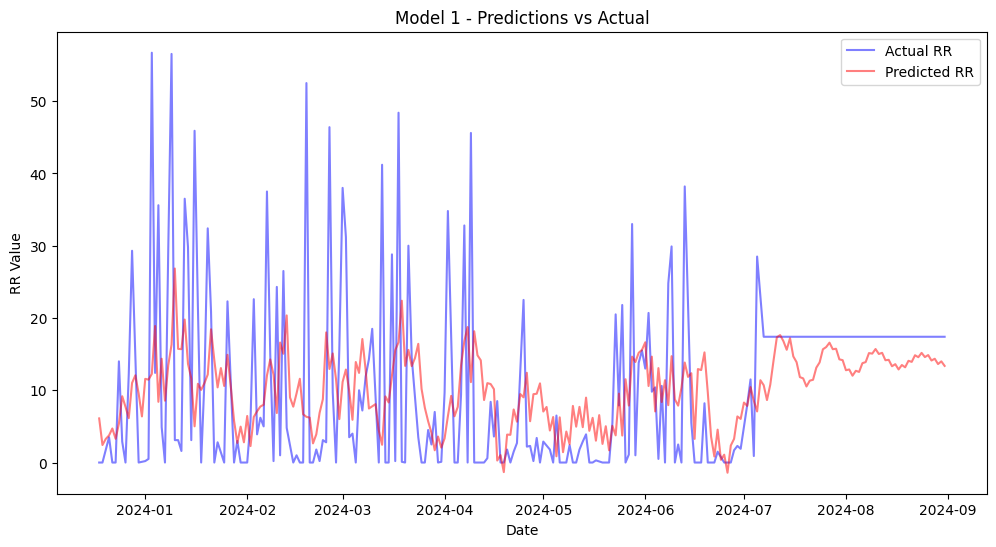

Model 1 - MSE: 127.2392, MAE: 7.9931, R²: 0.1167


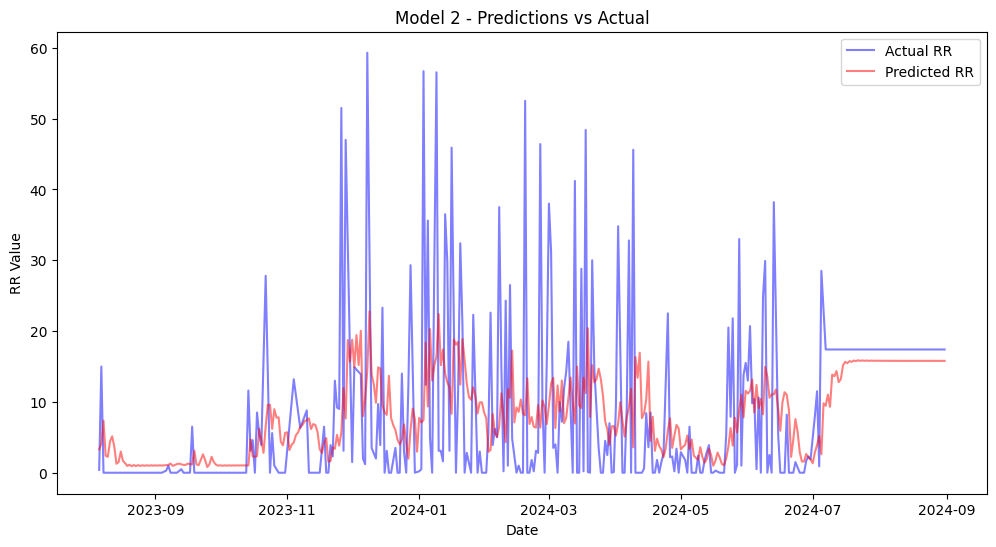

Model 2 - MSE: 112.9955, MAE: 6.7173, R²: 0.1634


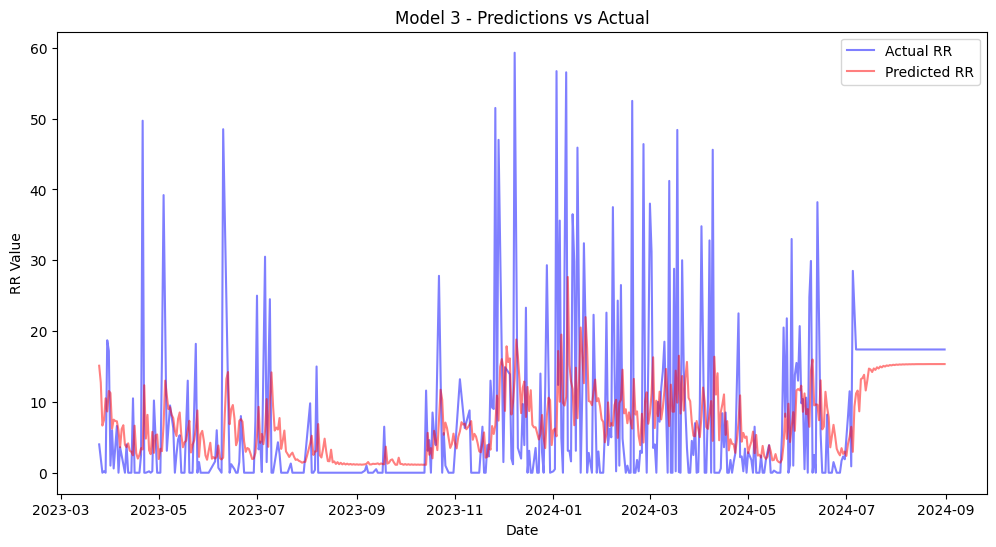

Model 3 - MSE: 108.3114, MAE: 6.5504, R²: 0.1313


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to visualize predictions vs actual values
def visualize_predictions(actual, predicted, dates, model_index):
    plt.figure(figsize=(12, 6))
    plt.plot(dates, actual, label='Actual RR', color='blue', alpha=0.5)
    plt.plot(dates, predicted, label='Predicted RR', color='red', alpha=0.5)
    plt.title(f'Model {model_index + 1} - Predictions vs Actual')
    plt.xlabel('Date')
    plt.ylabel('RR Value')
    plt.legend()
    plt.show()

# Calculate error metrics and visualize predictions for each model
for i in range(len(df_test_list)):
    # Get the actual values from the corresponding test dataset
    actual_values = df_test_list[i]['RR'].values[seq_length:]  # Adjust for sequence length

    # Predicted values from the hybrid model (final predictions)
    predicted_values = hybrid_result[i]['final_predictions']

    # Align the dates for the actual and predicted values
    test_dates = df_test_list[i].index[seq_length:]  # Get the dates, starting from the sequence length
    
    # Visualize the actual vs predicted values
    visualize_predictions(actual_values, predicted_values, test_dates, i)

    # Calculate metrics
    mse = mean_squared_error(actual_values, predicted_values)
    mae = mean_absolute_error(actual_values, predicted_values)
    r2 = r2_score(actual_values, predicted_values)

    # Print the results
    print(f"Model {i + 1} - MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")


## Forecast 1 Year Ahead

## ARIMA

In [70]:
arima_1_year = new_df['RR']
arima_1_year.head()

date
2021-01-01     0.8
2021-01-02     2.0
2021-01-03     3.2
2021-01-04     2.4
2021-01-05    49.8
Name: RR, dtype: float64

In [76]:
# Tentukan range untuk p, d, q
p = range(0, 5)
d = range(0, 1)
q = range(0, 1)

# Kombinasi p, d, q
pdq = list(itertools.product(p, d, q))

# Iterasi untuk mencari model terbaik berdasarkan AIC
best_aic_for_year = float("inf")
best_pdq_for_year = None

for param in pdq:
    try:
        model = ARIMA(arima_1_year['RR'], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic_for_year = results.aic
            best_pdq_for_year = param
    except:
        continue
    
print(f'Best ARIMA model: ARIMA{best_pdq_for_year} with AIC: {best_aic_for_year}')

Best ARIMA model: ARIMANone with AIC: inf


In [77]:
# ARIMA forecast for 1 year (e.g., 365 days if daily data)
forecast_steps = 365  # Or 12 for monthly data
arima_model = ARIMA(new_df['RR'], order=(3,0,2))
arima_model_fit = arima_model.fit()

# Forecast 1 year into the future
arima_forecast = arima_model_fit.forecast(steps=forecast_steps)

# If you want to forecast with confidence intervals
forecast_with_ci = arima_model_fit.get_forecast(steps=forecast_steps)
arima_forecast_values = forecast_with_ci.predicted_mean
arima_forecast_conf_int = forecast_with_ci.conf_int()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


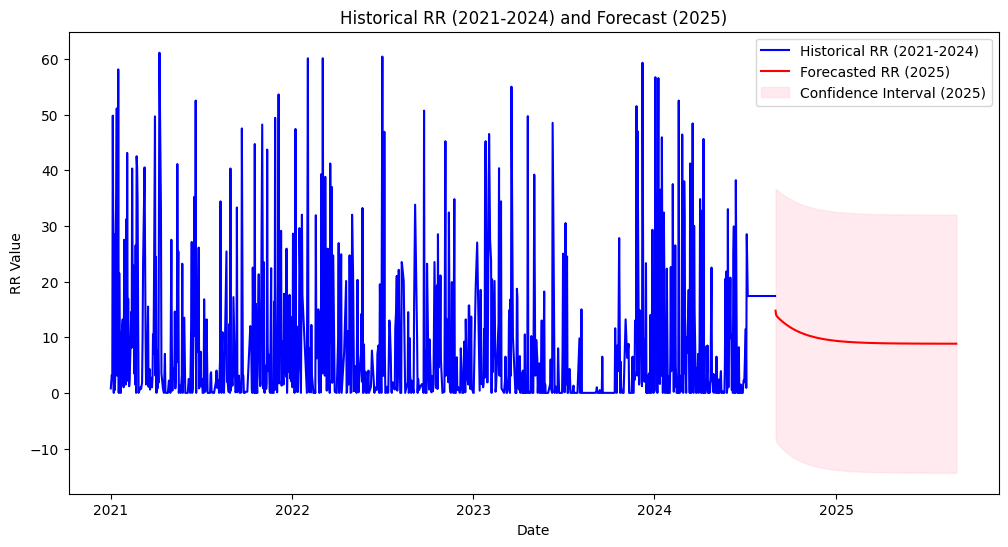

In [78]:
# Get the last date from new_df
last_date = new_df.index[-1]

# Create a new date range starting from the last date in new_df
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Combine historical data with forecasted values for plotting
forecast_df = pd.DataFrame({'RR': arima_forecast_values}, index=future_dates)

# Ensure confidence intervals and forecast values are numeric
arima_forecast_conf_int = arima_forecast_conf_int.apply(pd.to_numeric, errors='coerce')
forecast_df['RR'] = pd.to_numeric(forecast_df['RR'], errors='coerce')

# Plot the historical data (2021-2024) and forecast (2025) after conversion
plt.figure(figsize=(12, 6))
plt.plot(new_df.index, new_df['RR'], label='Historical RR (2021-2024)', color='blue')
plt.plot(forecast_df.index, forecast_df['RR'], label='Forecasted RR (2025)', color='red')
plt.fill_between(forecast_df.index, arima_forecast_conf_int.iloc[:, 0], arima_forecast_conf_int.iloc[:, 1],
                 color='pink', alpha=0.3, label='Confidence Interval (2025)')
plt.title('Historical RR (2021-2024) and Forecast (2025)')
plt.xlabel('Date')
plt.ylabel('RR Value')
plt.legend()
plt.show()

## CNN